# Time series

Датасет для роботи:

https://fred.stlouisfed.org/series/T10Y2Y

На вибір - SARIMA(ARIMA), Darts, Prophet

In [ ]:
# Підключаємо Google Drive з датасетами
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Імпортуємо всі необхідні бібліотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()

%config InlineBackend.figure_format = "png"

# зчитуємо набір даних
datasets_path = "/content/drive/MyDrive/Colab Notebooks/fred_t10y2y/"
df = pd.read_csv(datasets_path + "T10Y2Y.csv", sep=",", index_col=["DATE"], parse_dates=["DATE"])

In [ ]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.8/722.8 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.2/729.2 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.6/273.6 kB 24.2 MB/s eta 

In [ ]:
df.head()

,T10Y2Y
DATE,
2018-07-23,0.32
2018-07-24,0.32
2018-07-25,0.28
2018-07-26,0.29
2018-07-27,0.29


Датасет представляє собою часовий ряд.

# Аналіз та перетворення датасету

In [ ]:
# Подивимось на загальну інформацію по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2018-07-23 to 2023-07-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T10Y2Y  1305 non-null   object
dtypes: object(1)
memory usage: 20.4+ KB


In [ ]:
# Також у датасеті є пусті значення `.`, ми можемо вказати для них попередні значення
print(df[df["T10Y2Y"] == "."].count())
df[df["T10Y2Y"] == "."] = np.NaN
df = df.fillna(method="ffill")
print(df[df["T10Y2Y"] == "."].count())

T10Y2Y    55
dtype: int64
T10Y2Y    0
dtype: int64


In [ ]:
# Зробимо перетворення фічі T10Y2Y у float тип
df["T10Y2Y"] = df["T10Y2Y"].astype("float32")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2018-07-23 to 2023-07-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T10Y2Y  1305 non-null   float32
dtypes: float32(1)
memory usage: 15.3 KB


In [ ]:
# Подивимось на описову статистику
df.describe()

,T10Y2Y
count,1305.000000
mean,0.306276
std,0.601318
min,-1.080000
25%,0.100000
50%,0.250000
75%,0.670000
max,1.590000


<Axes: xlabel='DATE'>

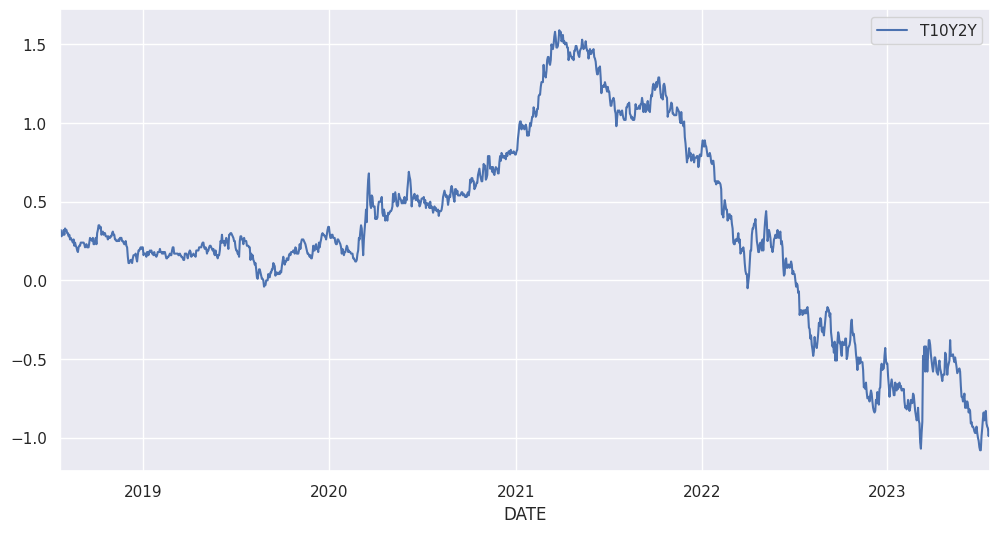

In [ ]:
# Подивимось на графік часового ряду
df.plot(figsize=(12, 6))

Бачимо, що присутня деяка кількість шуму (не дуже багато). Також, ряд не є стаціонарним.

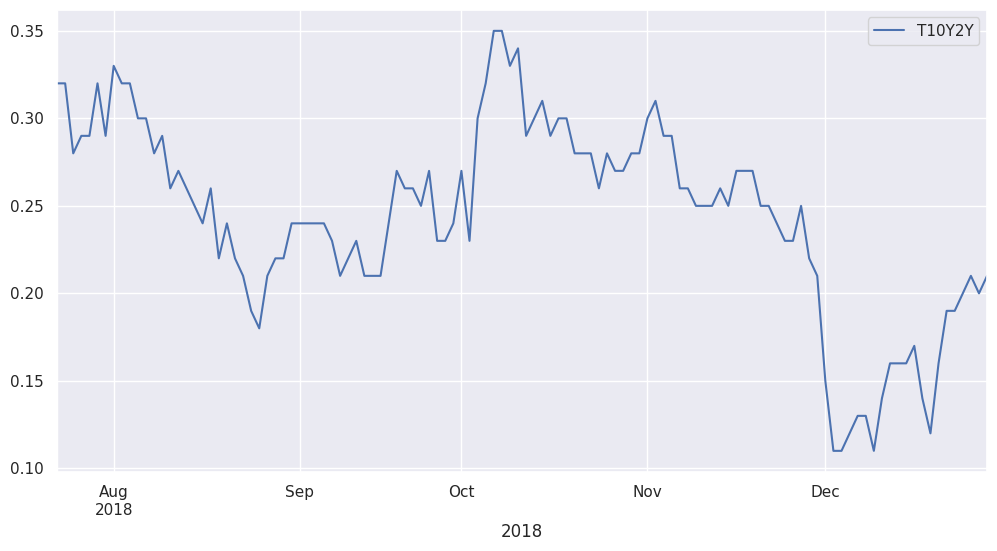

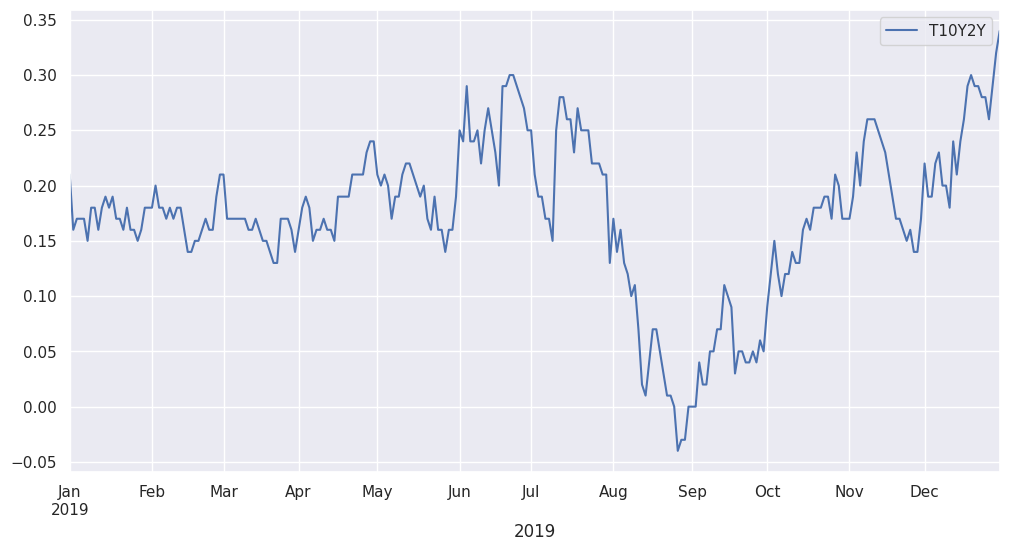

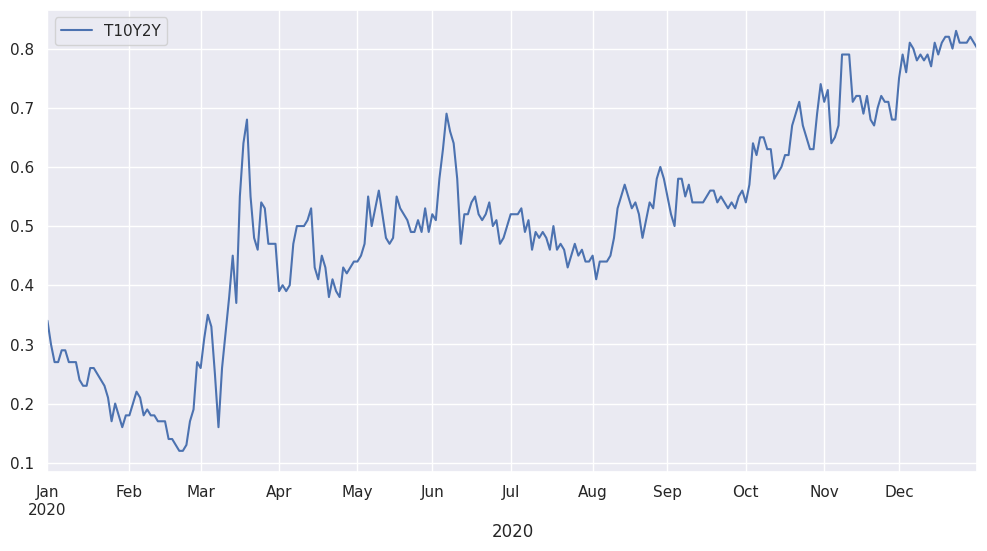

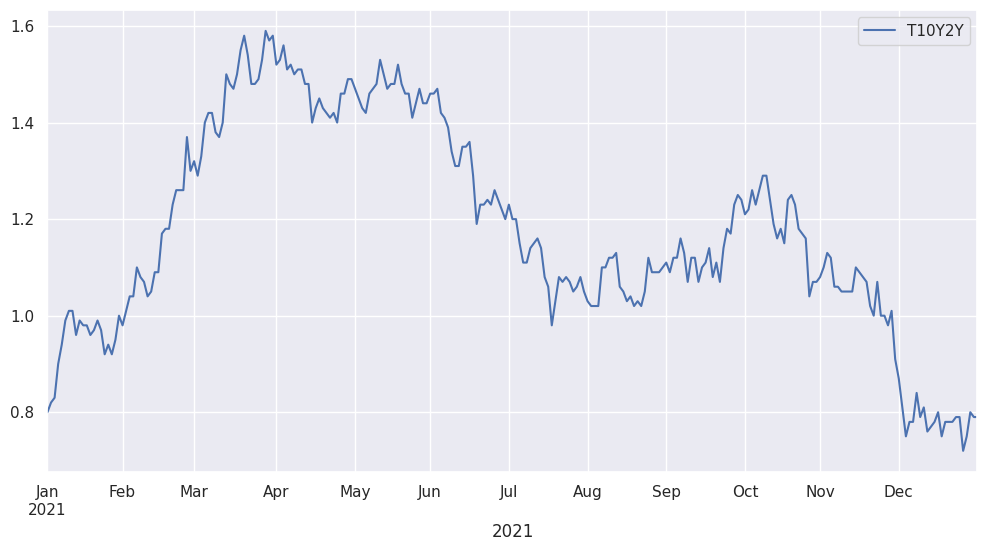

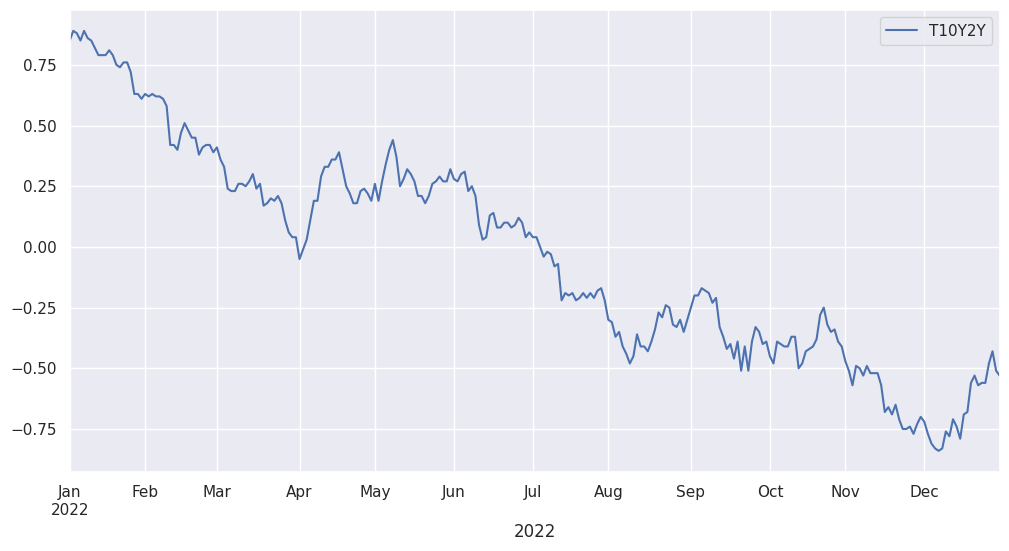

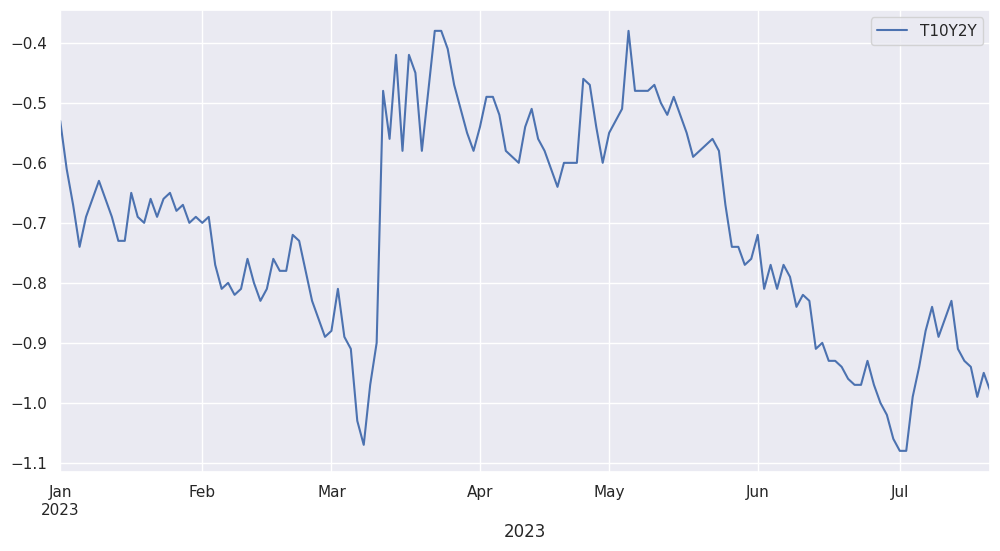

In [ ]:
# Тепер поглянемо на річні графіки
for year in ["2018", "2019", "2020", "2021", "2022", "2023"]:
  df.loc[year].plot(figsize=(12,6), xlabel=year)

Згідно з графіками можно зробити висновок що сезонності у даних немає, або вона не дуже виражена.

<Axes: xlabel='DATE'>

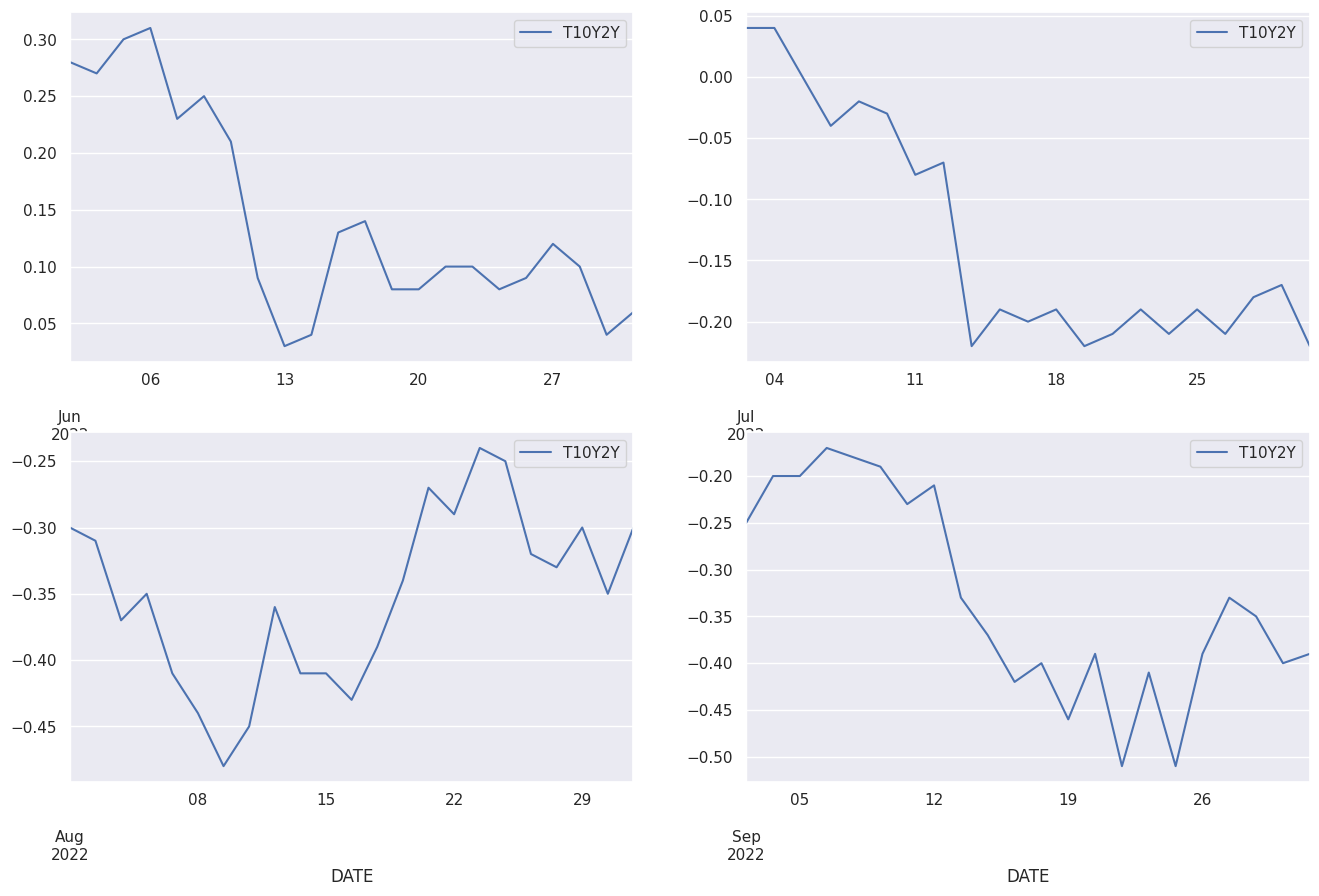

In [ ]:
# Подивимось, як змінюється значення за місяць
fig, axes = plt.subplots(nrows=2, ncols=2)
df.loc['2022-06'].plot(figsize=(16,10), ax=axes[0, 0])
df.loc['2022-07'].plot(figsize=(16,10), ax=axes[0, 1])
df.loc['2022-08'].plot(figsize=(16,10), ax=axes[1, 0])
df.loc['2022-09'].plot(figsize=(16,10), ax=axes[1, 1])

Переглянувши графіки за місяць, можна сказати, що дуже різкої зміни значення не відбувається. Тож можемо зробити ре-семплінг на середньомісячне значення.

<Axes: xlabel='DATE'>

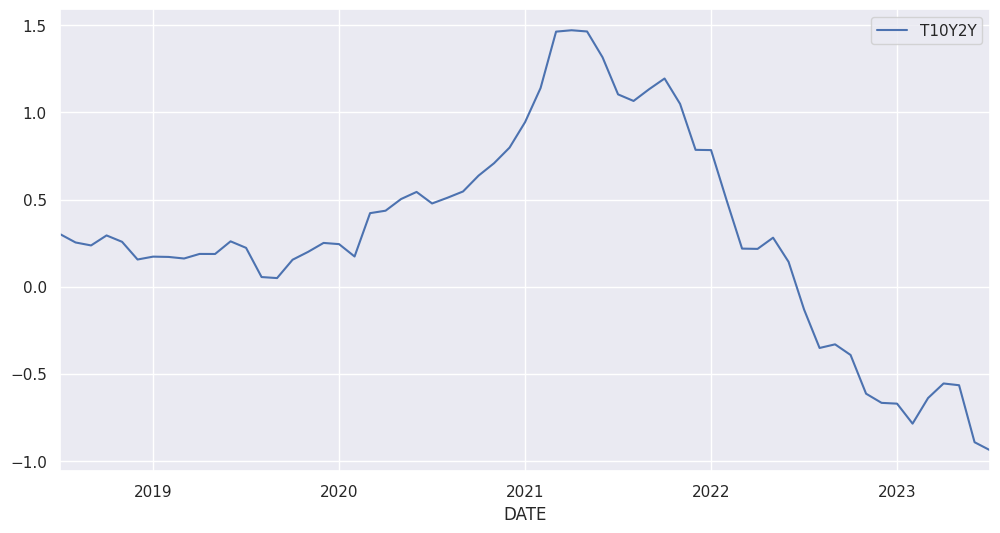

In [ ]:
df_mean = df.resample("M").mean()
df_mean.plot(figsize=(12,6))

Так ми трохи сгладили графік, прибравши шум і зберігши основний тренд і усі основні зміни значень.

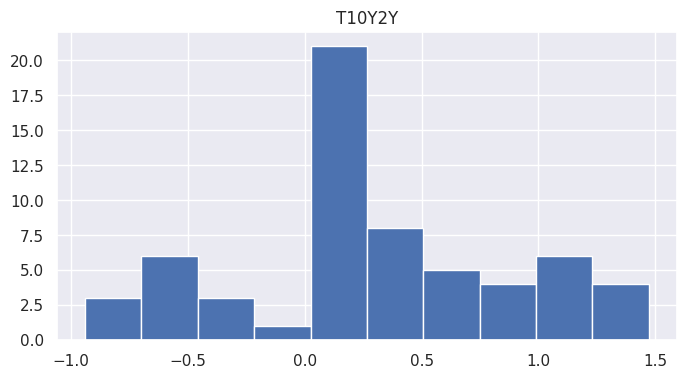

In [ ]:
# Тепер подивимось на розподіл значень
df_mean.hist(figsize=(8, 4));

In [ ]:
V = df_mean["T10Y2Y"].std() / df_mean["T10Y2Y"].mean()
print(f"V = {V}")

V = 2.012873888015747


Згідно гістограми та порахованому коефіцієнту варіації можно зробити висновок що ряд не однорідний і має достатньо великий розкид значень. Тепер проведемо тест Харкі-Бера, щоб підтвердити, або спростувати це.

In [ ]:
from statsmodels.stats.stattools import jarque_bera

rows = ["JB", "p-value", "skew", "kurtosis"]
results = jarque_bera(df_mean)

for i in range(0, len(rows)):
  print(f"{rows[i]}: {results[i][0]}")

JB: 0.4172258889901425
p-value: 0.8117093514222393
skew: -0.05283837531428247
kurtosis: 2.6088646365976897


In [ ]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(df_mean)
print(f"adf: {results[0]}")
print(f"p-value: {results[1]}")
print(f"Critical values: {results[4]}")
if results[0] > results[4]["5%"]:
    print("є одиничні корені, ряд не стаціонарний")
else:
    print("одиничних коренів немає, ряд стаціонарний")

adf: -0.34123712867033945
p-value: 0.9194574620660941
Critical values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
є одиничні корені, ряд не стаціонарний


In [ ]:
# Визначимо порядок інтегрованого ряда для нашого ряда
df1diff = df_mean.diff(periods=1).dropna()

In [ ]:
# Перевіримо ряд на стаціонарність
results = adfuller(df1diff)
print(f"adf: {results[0]}")
print(f"p-value: {results[1]}")
print(f"Critical values: {results[4]}")
if results[0] > results[4]["5%"]:
    print("є одиничні корені, ряд не стаціонарний")
else:
    print("одиничних коренів немає, ряд стаціонарний")

adf: -5.0918537401047255
p-value: 1.4557504330885398e-05
Critical values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
одиничних коренів немає, ряд стаціонарний


<Axes: xlabel='DATE'>

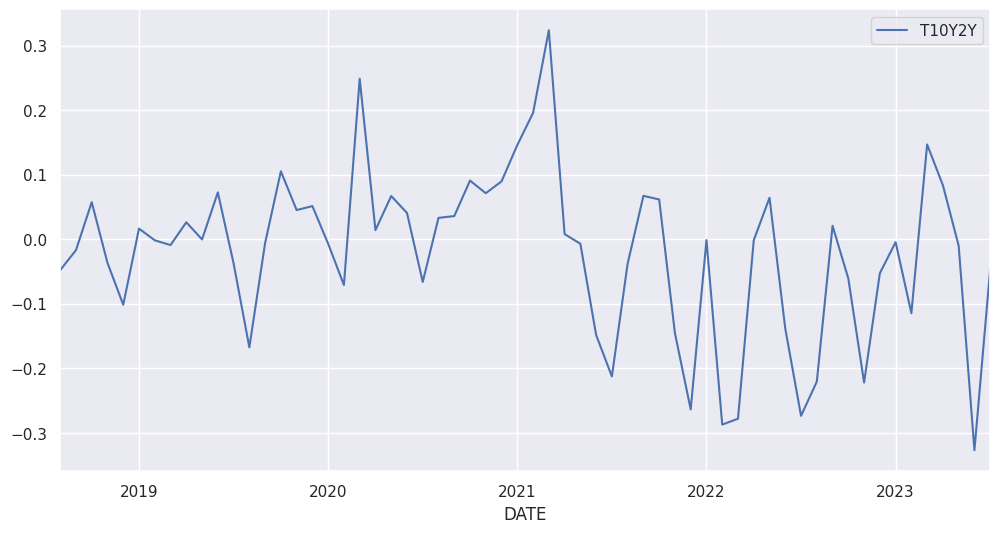

In [ ]:
df1diff.plot(figsize=(12,6))

Можемо побачити, що ярко вираженого тренду дійсно нема, тобто ряд ряд перших різностей є стаціонарним, а наш усереднений ряд є інтегрованим рядом першого порядку. Тепер перейдемо до побудови моделей.

# ARIMA

Для побудови моделі ARIMA ми визначили порядок інтегрованого ряду (він дорівнює 1). Тепер потрібно визначити порядок компоненти авторегрессіонної моделі (AR) та порядок компоненти ковзаючого середнього (MA).

p — порядок компоненты AR

d — порядок интегрированного ряда (1)

q — порядок компонетны MA

Модель ARIMA була обрана тому, що в даних немає чіткої сезонності, тому SARIMA нам тут не підходить.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


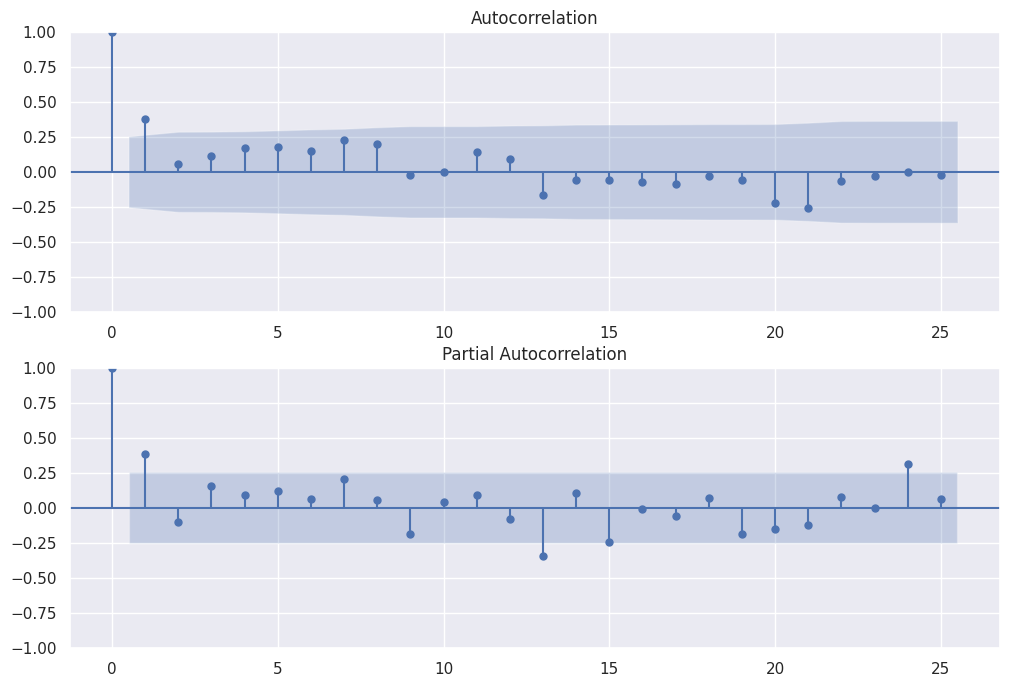

In [ ]:
# Побудуємо графік фунцкії ACF, який допоможе визначити порядок компоненти MA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df1diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df1diff, lags=25, ax=ax2)

Визначаємо, що **p=1** і **q=1**. Тепер можемо побудувати модель ARIMA.

In [ ]:
# Будуємо модель ARIMA з попередньо отриманими коефіцієнтами
from statsmodels.tsa.arima.model import ARIMA

train = df_mean[:"2021"]
model = ARIMA(train, order=(1, 1, 1), freq="M").fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                 T10Y2Y   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  35.939
Date:                Tue, 25 Jul 2023   AIC                            -65.879
Time:                        18:46:48   BIC                            -60.738
Sample:                    07-31-2018   HQIC                           -64.007
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2348      0.392      0.599      0.549      -0.533       1.002
ma.L1          0.2361      0.417      0.566      0.572      -0.582       1.054
sigma2         0.0101      0.002      4.933      0.0

In [ ]:
# проведемо тест Льюнга-Бокса на залишках моделі, щоб перевірити че є ці залишки "білим шумом"
from statsmodels.tsa.stattools import acf

q_test = acf(model.resid, qstat=True)
pd.DataFrame({"Q-stat": q_test[1], "p-value": q_test[2]})

,Q-stat,p-value
0,0.043484,0.834816
1,0.045159,0.977674
2,0.051444,0.996944
3,2.294288,0.681809
4,3.271260,0.658244
5,3.569876,0.734651
6,3.609171,0.823531
7,3.800008,0.874702
8,4.078195,0.906191
9,5.297087,0.870469


Нажаль, p-value має великі значення, тож можно сказати що скоріш за все залишки не є білим шумом.

In [ ]:
# порахуємо R^2
from sklearn.metrics import r2_score

predict = model.predict("2021", "2024", typ="levels")
r2 = r2_score(df_mean["2021":], predict[:31])
print(f"R^2: {r2}")

R^2: -0.01974515449880787


<Axes: xlabel='DATE'>

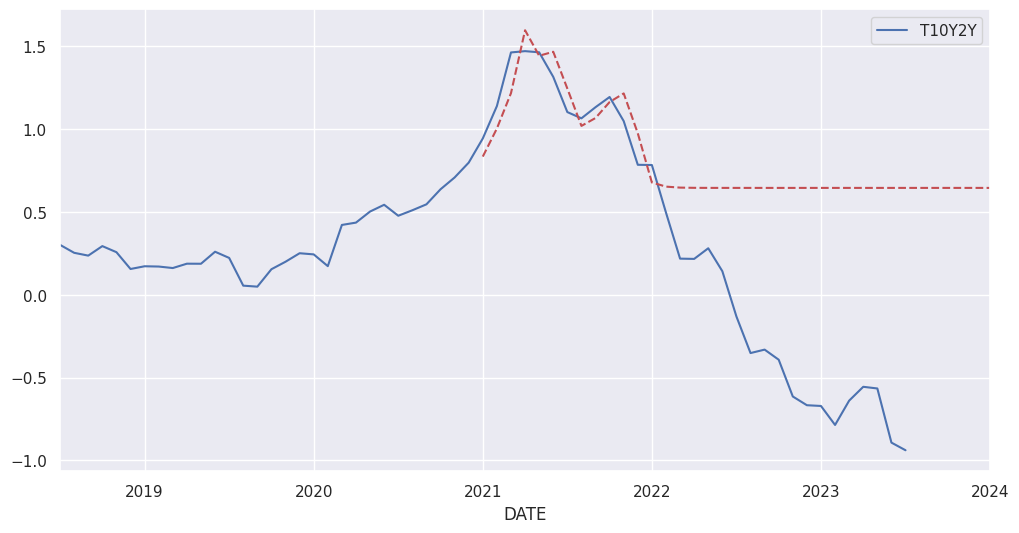

In [ ]:
# та побудуємо графік, на якому виведемо поточні значення датасету та отриманий предікт
df_mean.plot(figsize=(12,6))
predict.plot(style='r--')

Можемо побачити, що дані за період 2021-2023 років модель спрогнозувала схоже, але потім стрімке падіння з 2022 року спрогнозувати не вийшло зовсім. Це пов'язано не тільки з якістю моделі, а й з тим, що в датасеті за попередні роки не було схожого низхідного тренду. Тому для такої моделі потрібно більше даних з урахуванням руху тренду в обох напрямках. А може не потрібно було проводити трансформацію ряду у середньомісячні значення.

# Darts

In [ ]:
# зробимо перетворення DataFrame в TimeSeries біблотеки Darts
from darts import TimeSeries

ts = TimeSeries.from_dataframe(df)
ts.head()

<TimeSeries (DataArray) (DATE: 5, component: 1, sample: 1)>
array([[[0.32]],

       [[0.32]],

       [[0.28]],

       [[0.29]],

       [[0.29]]], dtype=float32)
Coordinates:
  * DATE       (DATE) datetime64[ns] 2018-07-23 2018-07-24 ... 2018-07-27
  * component  (component) object 'T10Y2Y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

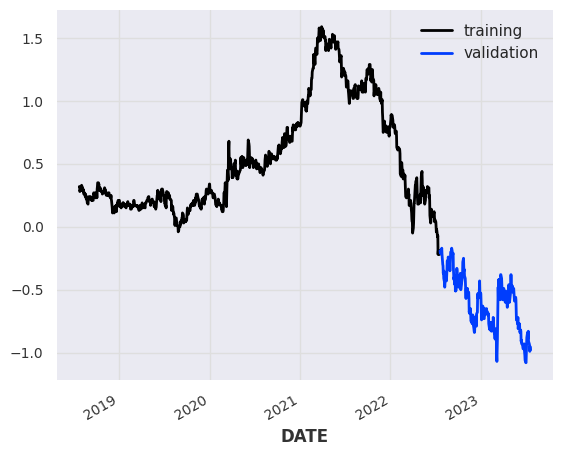

In [ ]:
# розділимо дані на тренувальну і валідаційну частини
train, val = ts.split_before(0.8)
train.plot(label="training")
val.plot(label="validation")

На графіку бачимо, яка саме частина даних була віднесена до тренувальної частини, а яка до валідаційної.

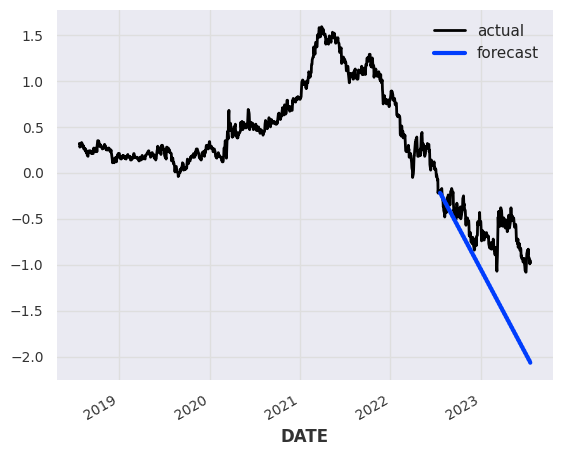

In [ ]:
# AutoArima
from darts.models import AutoARIMA

aarima = AutoARIMA()
aarima.fit(train)
prediction = aarima.predict(len(val))

ts.plot(label="actual")
prediction.plot(label="forecast", lw=3)
plt.legend()

AutoARIMA в цілому майже правильно спрогнозувала напрямок тренду валідаційної частини, але не зовсім точно.

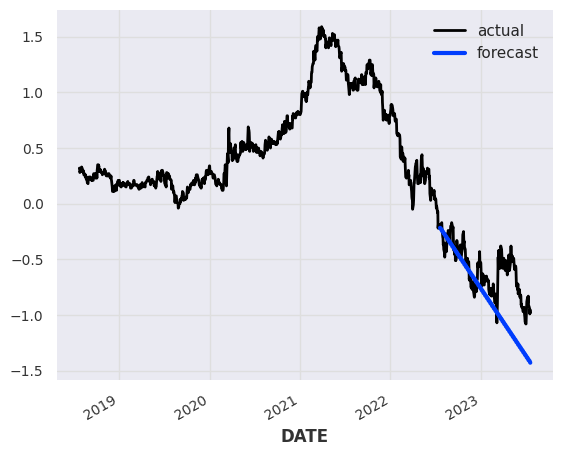

In [ ]:
# ExponentialSmoothing
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

ts.plot(label="actual")
prediction.plot(label="forecast", lw=3)
plt.legend()

ExponentialSmoothing побудував прогноз тренду вже більш точніше, набагато краще, ніж AutoARIMA.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptsy3w_e0/qcrrt9m1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptsy3w_e0/u9y2vq8e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86843', 'data', 'file=/tmp/tmptsy3w_e0/qcrrt9m1.json', 'init=/tmp/tmptsy3w_e0/u9y2vq8e.json', 'output', 'file=/tmp/tmptsy3w_e0/prophet_modelw_cs2us1/prophet_model-20230725185528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:55:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:55:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


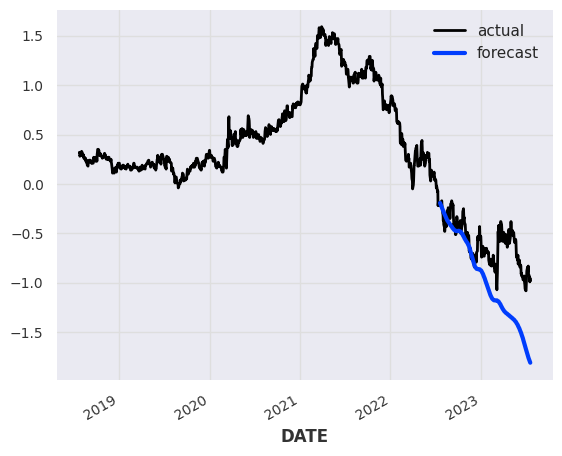

In [ ]:
# Prophet
from darts.models import Prophet

model = Prophet()
model.fit(train)
prediction = model.predict(len(val))

ts.plot(label="actual")
prediction.plot(label="forecast", lw=3)
plt.legend()

Prophet непогано побудував прогноз для напрямку тренду, навіть спробував спрогнозувати коливання.

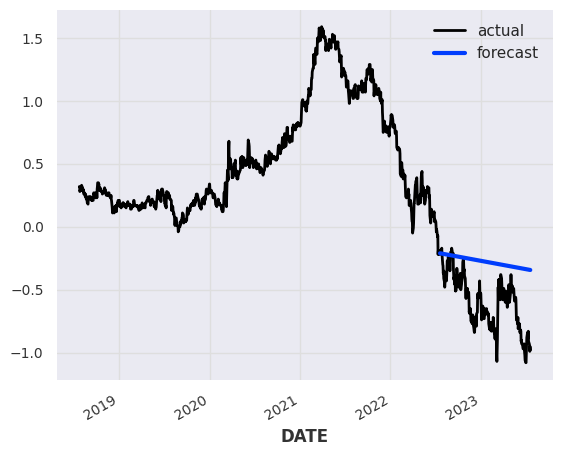

In [ ]:
from darts.models import NaiveDrift

model = NaiveDrift()
model.fit(train)
prediction = model.predict(len(val))

ts.plot(label="actual")
prediction.plot(label="forecast", lw=3)
plt.legend()

NaiveDrift не дуже добре побудував прогноз.

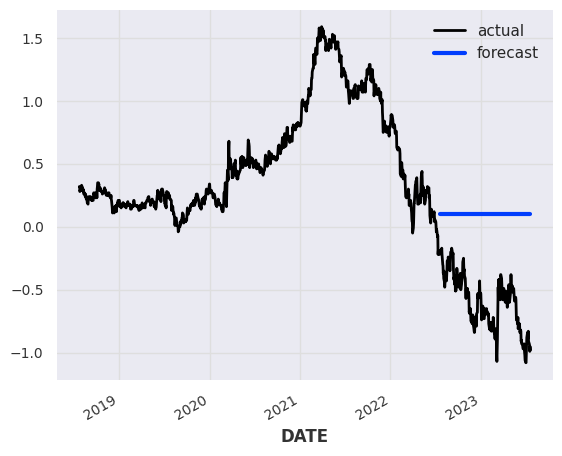

In [ ]:
from darts.models import Croston

model = Croston()
model.fit(train)
prediction = model.predict(len(val))

ts.plot(label="actual")
prediction.plot(label="forecast", lw=3)
plt.legend()

Croston наче не старався зовсім.

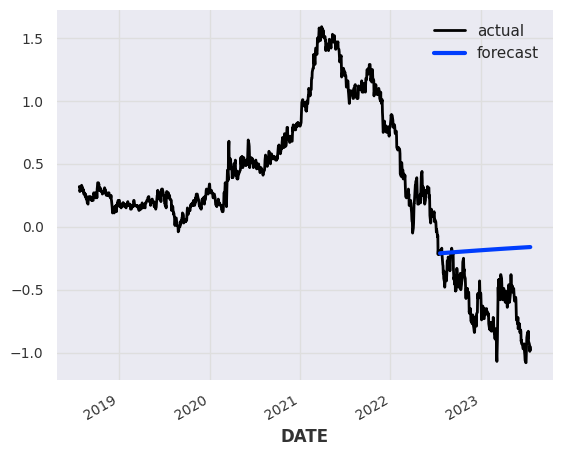

In [ ]:
# StatsForecastETS
from darts.models import KalmanForecaster

model = KalmanForecaster()
model.fit(train)
prediction = model.predict(len(val))

ts.plot(label="actual")
prediction.plot(label="forecast", lw=3)
plt.legend()

KalmanForecaster взагалі вирішив будувати напрямок тренду в іншу сторону. Давайте подивимось, як ці моделі побудували прогнози на історичних даних за допомогою backtesting.

In [ ]:
# Backtests part 1
models = [
    AutoARIMA(),
    ExponentialSmoothing(),
    Prophet(),
]

backtests = [
    model.historical_forecasts(
        ts,
        start=.75,
        forecast_horizon=1,
    ) for model in models
]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptsy3w_e0/jn5rta1b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptsy3w_e0/_63xhkqy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62783', 'data', 'file=/tmp/tmptsy3w_e0/jn5rta1b.json', 'init=/tmp/tmptsy3w_e0/_63xhkqy.json', 'output', 'file=/tmp/tmptsy3w_e0/prophet_model2k_tp6s2/prophet_model-20230725232221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:22:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:22:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpts

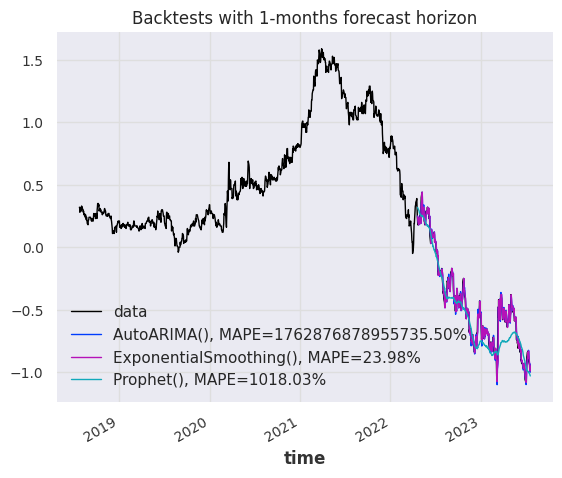

In [ ]:
# рахуємо MAPE для кожної моделі
from darts.metrics import mape

ts.plot(label="data", lw=1)
for i, m in enumerate(models):
    err = mape(backtests[i], ts)
    backtests[i].plot(lw=1, label="{}, MAPE={:.2f}%".format(m, err))

plt.title("Backtests with 1-months forecast horizon")
plt.legend()

Згідно бектестінгу на 25% датасету з `forecast_horizon=1` найкраще себе показала модель ExponentialSmoothing, яка має MAPE `23.98%`.

In [ ]:
# Backtests part 2
models = [
    NaiveDrift(),
    Croston(),
    KalmanForecaster(),
]

backtests = [
    model.historical_forecasts(
        ts,
        start=.75,
        forecast_horizon=1,
    ) for model in models
]

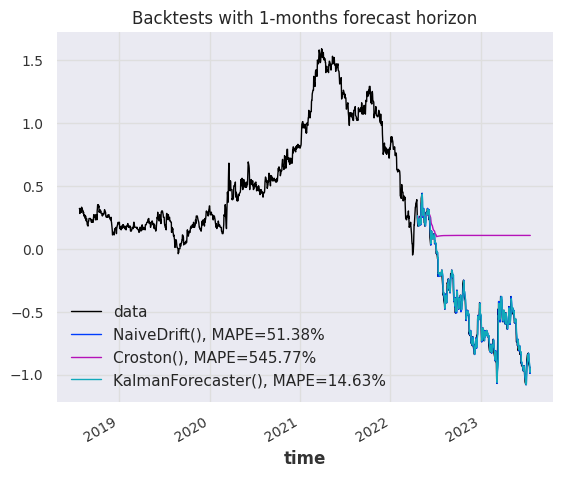

In [ ]:
# рахуємо MAPE для кожної моделі
from darts.metrics import mape

ts.plot(label="data", lw=1)
for i, m in enumerate(models):
    err = mape(backtests[i], ts)
    backtests[i].plot(lw=1, label="{}, MAPE={:.2f}%".format(m, err))

plt.title("Backtests with 1-months forecast horizon")
plt.legend()

Тут найкраще себе показав KalmanForecaster, але згідно його графіка вище ми бачимо, що для предікту він нам не підходить.

# Висновок

В ході цієї роботи було досліджено принципи прогнозування часового ряду. Розібралися як працювати з моделлю ARIMA та бібліотекою Dart, яка є потужним інструментом з high-level API і великою кількістью моделей саме для роботи з часовими рядами.